<a href="https://colab.research.google.com/github/keeprich/AI-Trading-Bot/blob/main/data_collection_yahoo_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection Code using Yahoo finance

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

# Function to collect historical data from Yahoo Finance
def collect_yahoo_data(ticker, start_date, end_date, interval="1d"):
    """
    Fetch historical data from Yahoo Finance.

    Args:
        ticker (str): The stock or asset ticker (e.g., "EURUSD=X").
        start_date (str): Start date in YYYY-MM-DD format.
        end_date (str): End date in YYYY-MM-DD format.
        interval (str): Data interval ("1d", "1h", etc.).

    Returns:
        pd.DataFrame: DataFrame containing historical data.
    """
    try:
        data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
        if not data.empty:
            data.reset_index(inplace=True)  # Reset index to make Datetime a column
            return data
        else:
            print("No data fetched.")
            return pd.DataFrame()
    except Exception as e:
        print(f"Error fetching data: {e}")
        return pd.DataFrame()

# Main execution
if __name__ == "__main__":
    # Define parameters
    ticker = "EURUSD=X"  # Yahoo Finance ticker for EUR/USD currency pair
    start_date = "2023-01-01"  # Start date for the data
    end_date = "2024-07-31"    # End date for the data
    interval = "1h"  # Hourly data (can be changed to "1d" for daily)

    # Collect data
    data = collect_yahoo_data(ticker, start_date, end_date, interval)

    # Save data to CSV
    if not data.empty:
        file_name = f"{ticker}_{start_date}_to_{end_date}.csv"
        data.to_csv(file_name, index=False)
        print(f"Data successfully saved to {file_name}")
    else:
        print("No data collected.")


[*********************100%***********************]  1 of 1 completed


Data successfully saved to EURUSD=X_2023-01-01_to_2024-07-31.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Load the data from the CSV file
file_name = "EURUSD=X_2023-01-01_to_2024-07-31.csv"  # Replace with your CSV file path
df = pd.read_csv(file_name)

In [ ]:
df.head()

,Datetime,Adj Close,Close,High,Low,Open,Volume
0,NaN,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
1,2023-01-02 00:00:00+00:00,1.0708931684494019,1.0708931684494019,1.0711225271224976,1.0698620080947876,1.0700910091400146,0
2,2023-01-02 01:00:00+00:00,1.0706638097763062,1.0706638097763062,1.071237325668335,1.0700910091400146,1.0710078477859497,0
3,2023-01-02 02:00:00+00:00,1.0704345703125,1.0704345703125,1.0704345703125,1.06963312625885,1.0704345703125,0
4,2023-01-02 03:00:00+00:00,1.0708931684494019,1.0708931684494019,1.0708931684494019,1.0700910091400146,1.0705492496490479,0


In [ ]:
# Ensure the 'Datetime' column is in datetime format and handle NaT values
df["Datetime"] = pd.to_datetime(df["Datetime"], errors='coerce')  # 'coerce' converts invalid parsing to NaT
df.dropna(subset=["Datetime"], inplace=True)  # Remove rows with NaT in 'Datetime'

In [ ]:
df.head()

,Datetime,Adj Close,Close,High,Low,Open,Volume
1,2023-01-02 00:00:00+00:00,1.0708931684494019,1.0708931684494019,1.0711225271224976,1.0698620080947876,1.0700910091400146,0
2,2023-01-02 01:00:00+00:00,1.0706638097763062,1.0706638097763062,1.071237325668335,1.0700910091400146,1.0710078477859497,0
3,2023-01-02 02:00:00+00:00,1.0704345703125,1.0704345703125,1.0704345703125,1.06963312625885,1.0704345703125,0
4,2023-01-02 03:00:00+00:00,1.0708931684494019,1.0708931684494019,1.0708931684494019,1.0700910091400146,1.0705492496490479,0
5,2023-01-02 04:00:00+00:00,1.0700910091400146,1.0700910091400146,1.0711225271224976,1.0698620080947876,1.070778489112854,0


# Develop a machine learning-based trading strategy that predicts whether to buy or sell based on technical indicators (like Moving Averages) derived from the dataset.



# RandomForestClassifier

Accuracy: 0.9598971722365038
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       972
           1       0.96      0.97      0.96       973

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



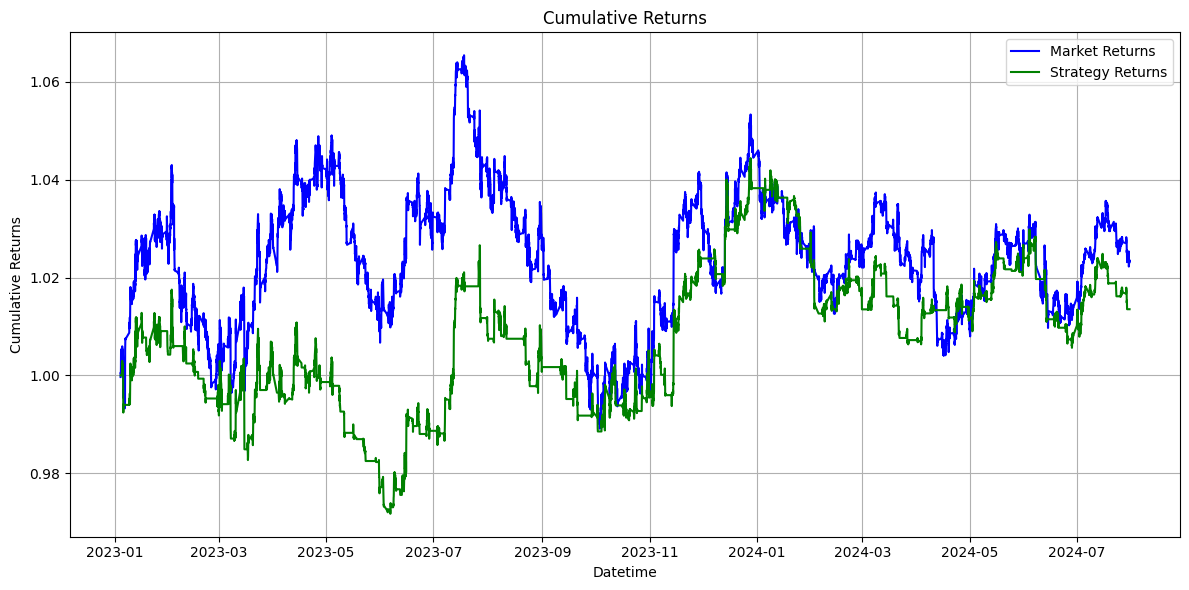

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
file_name = "EURUSD=X_2023-01-01_to_2024-07-31.csv"  # Replace with your CSV file path
df = pd.read_csv(file_name)

# Ensure the 'Datetime' column is in datetime format
df["Datetime"] = pd.to_datetime(df["Datetime"], errors='coerce')
df.dropna(subset=["Datetime"], inplace=True)


# Ensure the 'Close' column is numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)



# Step 2: Feature Engineering (Calculate Technical Indicators)
df['SMA_20'] = df['Close'].rolling(window=20).mean()  # 20-day Simple Moving Average
df['SMA_50'] = df['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
df['RSI'] = 100 - (100 / (1 + df['Close'].diff().apply(lambda x: max(x, 0)).rolling(14).mean() /
                          df['Close'].diff().apply(lambda x: abs(x)).rolling(14).mean()))

# Drop rows with NaN values due to rolling calculations
df.dropna(inplace=True)

# Step 3: Create Target Variable
# 1 for Buy Signal (SMA_20 > SMA_50) and 0 for Sell Signal
df['Signal'] = np.where(df['SMA_20'] > df['SMA_50'], 1, 0)

# Step 4: Train-Test Split
features = ['SMA_20', 'SMA_50', 'RSI']  # Features used for prediction
X = df[features]
y = df['Signal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 7: Backtesting (Simulate Trades)
df['Predicted_Signal'] = model.predict(X)

# Calculate strategy returns
df['Market_Return'] = df['Close'].pct_change()
df['Strategy_Return'] = df['Market_Return'] * df['Predicted_Signal'].shift(1)  # Use previous prediction

# Step 8: Plot the Results
cumulative_market_returns = (1 + df['Market_Return']).cumprod()
cumulative_strategy_returns = (1 + df['Strategy_Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], cumulative_market_returns, label="Market Returns", color='blue')
plt.plot(df['Datetime'], cumulative_strategy_returns, label="Strategy Returns", color='green')
plt.title("Cumulative Returns")
plt.xlabel("Datetime")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# LogisticRegression

Logistic Regression Accuracy: 0.6071979434447301
Gradient Boosting Accuracy: 0.9033419023136247
Best Gradient Boosting Model: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Best Gradient Boosting Accuracy: 0.9737789203084833
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       972
           1       0.97      0.98      0.97       973

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



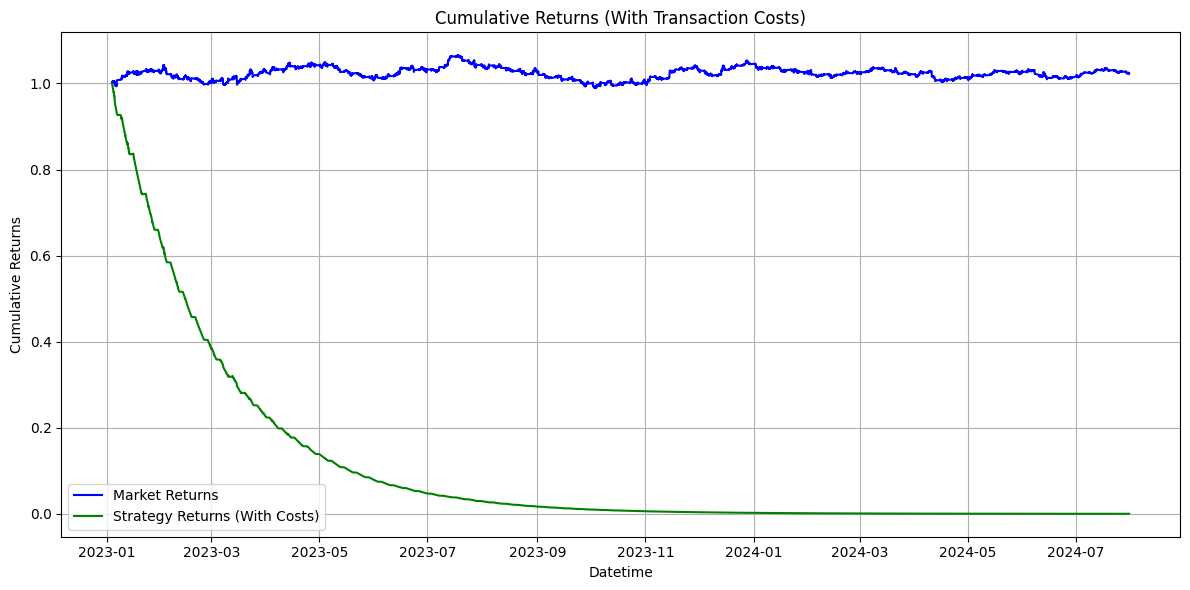

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
file_name = "EURUSD=X_2023-01-01_to_2024-07-31.csv"  # Replace with your CSV file path
df = pd.read_csv(file_name)

# Ensure the 'Datetime' column is in datetime format
df["Datetime"] = pd.to_datetime(df["Datetime"], errors='coerce')
df.dropna(subset=["Datetime"], inplace=True)

# Step 2: Feature Engineering (Technical Indicators)
# Simple Moving Averages
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()



# Ensure the 'Close' column is numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)

# Relative Strength Index (RSI)
df['RSI'] = 100 - (100 / (1 + df['Close'].diff().apply(lambda x: max(x, 0)).rolling(14).mean() /
                          df['Close'].diff().apply(lambda x: abs(x)).rolling(14).mean()))

# Bollinger Bands
df['Upper_Band'] = df['SMA_20'] + 2 * df['Close'].rolling(window=20).std()
df['Lower_Band'] = df['SMA_20'] - 2 * df['Close'].rolling(window=20).std()

# MACD (Moving Average Convergence Divergence)
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']

# Drop rows with NaN values due to rolling calculations
df.dropna(inplace=True)

# Step 3: Create Target Variable
df['Signal'] = np.where(df['SMA_20'] > df['SMA_50'], 1, 0)

# Step 4: Train-Test Split
features = ['SMA_20', 'SMA_50', 'RSI', 'Upper_Band', 'Lower_Band', 'MACD']
X = df[features]
y = df['Signal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train and Compare Models
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))

# Fine-Tune Gradient Boosting with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Gradient Boosting Model:", grid_search.best_params_)

# Evaluate the best model
best_preds = best_model.predict(X_test)
print("Best Gradient Boosting Accuracy:", accuracy_score(y_test, best_preds))
print(classification_report(y_test, best_preds))

# Step 6: Backtesting with Transaction Costs
df['Predicted_Signal'] = best_model.predict(X)

# Assume a 0.1% transaction cost per trade
transaction_cost = 0.001

# Market Return
df['Market_Return'] = df['Close'].pct_change()

# Strategy Return with Transaction Costs
df['Strategy_Return'] = (df['Market_Return'] * df['Predicted_Signal'].shift(1)) - transaction_cost

# Step 7: Plot Results
cumulative_market_returns = (1 + df['Market_Return']).cumprod()
cumulative_strategy_returns = (1 + df['Strategy_Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], cumulative_market_returns, label="Market Returns", color='blue')
plt.plot(df['Datetime'], cumulative_strategy_returns, label="Strategy Returns (With Costs)", color='green')
plt.title("Cumulative Returns (With Transaction Costs)")
plt.xlabel("Datetime")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# LSTM

In [ ]:
!pip install tensorflow

In [ ]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0790 - val_loss: 0.0011
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.0043 - val_loss: 5.7944e-04
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0034 - val_loss: 5.8132e-04
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.0031 - val_loss: 6.0059e-04
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0028 - val_loss: 4.9506e-04
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0023 - val_loss: 4.8260e-04
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0023 - val_loss: 5.6004e-04
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - loss: 0.0025 - val_loss: 5.4405e-04
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 0.0018 - val_loss: 4.8593e-04
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0019 - val_loss: 4.2341e-04
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0016 - val_loss: 6.4558e-04
Epoch 12/20
79/79 ━━━

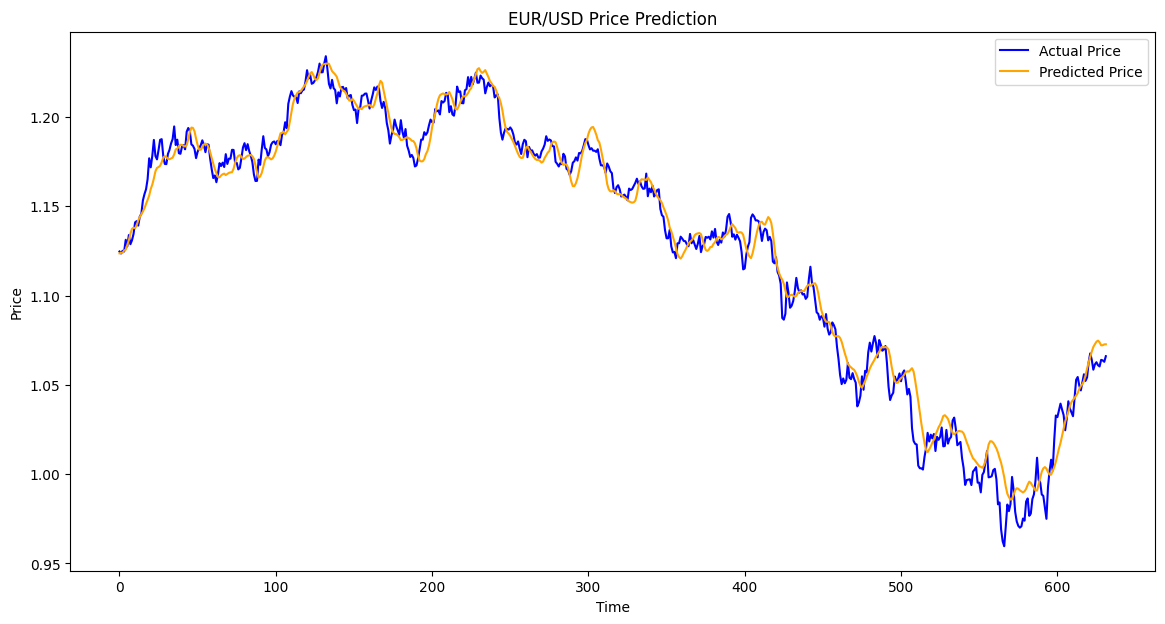

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Step 1: Fetch Data
def fetch_data(ticker, start="2010-01-01", end="2023-01-01"):
    try:
        data = yf.download(ticker, start=start, end=end)
        data = data[['Adj Close']].rename(columns={'Adj Close': ticker})
        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return pd.DataFrame()

# Step 2: Calculate Indicators
def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_sma(prices, window):
    return prices.rolling(window=window).mean()

def calculate_ema(prices, window):
    return prices.ewm(span=window, adjust=False).mean()

def calculate_bollinger_bands(prices, window=20):
    sma = prices.rolling(window=window).mean()
    std = prices.rolling(window=window).std()
    upper_band = sma + (2 * std)
    lower_band = sma - (2 * std)
    return sma, upper_band, lower_band

# Step 3: Preprocess Data
def preprocess_data(data, target_column, sequence_length=60):
    if data.empty:
        raise ValueError("Dataset is empty. Cannot preprocess.")
    # Scale data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    # Create sequences
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i])  # Sequence of features
        y.append(scaled_data[i, target_column])    # Target value
    X, y = np.array(X), np.array(y)

    return X, y, scaler

# Step 4: Build and Train LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 5: Plot Results
def plot_results(actual, predicted, title="Price Prediction"):
    plt.figure(figsize=(14, 7))
    plt.plot(actual, label="Actual Price", color="blue")
    plt.plot(predicted, label="Predicted Price", color="orange")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Step 6: Main Workflow
if __name__ == "__main__":
    # Fetch data for multiple instruments
    eurusd = fetch_data("EURUSD=X")
    gold = fetch_data("GC=F")  # Corrected ticker for gold

    if eurusd.empty or gold.empty:
        print("One or more datasets could not be fetched. Exiting.")
    else:
        # Add indicators to the dataset
        eurusd['RSI'] = calculate_rsi(eurusd['EURUSD=X'])
        eurusd['SMA_50'] = calculate_sma(eurusd['EURUSD=X'], window=50)
        eurusd['EMA_50'] = calculate_ema(eurusd['EURUSD=X'], window=50)
        eurusd['BB_Mid'], eurusd['BB_Upper'], eurusd['BB_Lower'] = calculate_bollinger_bands(eurusd['EURUSD=X'])

        # Drop NaN values caused by rolling calculations
        eurusd.dropna(inplace=True)

        # Combine EURUSD and Gold data (optional)
        data = pd.concat([eurusd, gold], axis=1).dropna()

        # Preprocess data for LSTM
        feature_columns = ['EURUSD=X', 'RSI', 'SMA_50', 'EMA_50', 'BB_Mid', 'BB_Upper', 'BB_Lower']
        target_column = 0  # Predict EUR/USD price
        X, y, scaler = preprocess_data(data[feature_columns], target_column)

        # Split into train and test sets
        split = int(0.8 * len(X))
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]

        # Build and train the LSTM model
        model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
        model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

        # Make predictions
        predictions = model.predict(X_test)

        # Reshape predictions and actual values
        predictions = predictions.reshape(-1, 1)  # Ensure shape is (n_samples, 1)
        y_test = y_test.reshape(-1, 1)            # Ensure shape is (n_samples, 1)

# Rescale predictions and actual values back to original scale
# ----> The scaler was fitted on the entire dataset with 7 features.
# ----> To inverse transform the predictions for a single feature (target_column),
# ----> we need to create a temporary array with the same number of features as the original data
# ----> and fill the target column with the predictions.

        temp_array = np.zeros((predictions.shape[0], len(feature_columns)))
        temp_array[:, target_column] = predictions.ravel()  # Fill target column with predictions
        predictions = scaler.inverse_transform(temp_array)[:, target_column]  # Inverse transform and extract target column

# ----> Similarly, for the actual values (y_test)
        temp_array = np.zeros((y_test.shape[0], len(feature_columns)))
        temp_array[:, target_column] = y_test.ravel()  # Fill target column with actual values
        actual = scaler.inverse_transform(temp_array)[:, target_column]  # Inverse transform and extract target column

# Plot results
        plot_results(actual, predictions, title="EUR/USD Price Prediction")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


No saved model found. Training a new model...
Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.0628 - val_loss: 8.3771e-04
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.0040 - val_loss: 5.4911e-04
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0030 - val_loss: 7.0248e-04
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0025 - val_loss: 6.1133e-04
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0022 - val_loss: 5.3740e-04
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - loss: 0.0021 - val_loss: 6.8020e-04
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0020 - val_loss: 7.0488e-04
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0020 - val_loss: 5.4093e-04
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 0.0019 - val_loss: 6.5246e-04
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.00

Model trained and saved successfully!
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


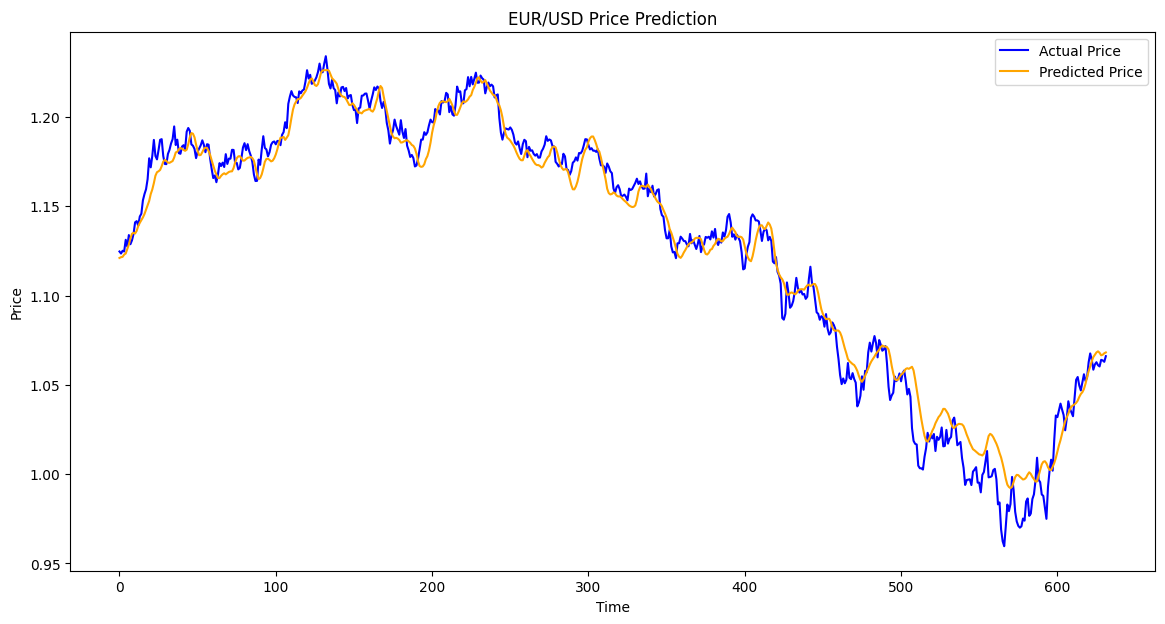

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Step 1: Fetch Data
def fetch_data(ticker, start="2010-01-01", end="2023-01-01"):
    try:
        data = yf.download(ticker, start=start, end=end)
        data = data[['Adj Close']].rename(columns={'Adj Close': ticker})
        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return pd.DataFrame()

# Step 2: Calculate Indicators
def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_sma(prices, window):
    return prices.rolling(window=window).mean()

def calculate_ema(prices, window):
    return prices.ewm(span=window, adjust=False).mean()

def calculate_bollinger_bands(prices, window=20):
    sma = prices.rolling(window=window).mean()
    std = prices.rolling(window=window).std()
    upper_band = sma + (2 * std)
    lower_band = sma - (2 * std)
    return sma, upper_band, lower_band

# Step 3: Preprocess Data
def preprocess_data(data, target_column, sequence_length=60):
    if data.empty:
        raise ValueError("Dataset is empty. Cannot preprocess.")
    # Scale data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    # Create sequences
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i])  # Sequence of features
        y.append(scaled_data[i, target_column])    # Target value
    X, y = np.array(X), np.array(y)

    return X, y, scaler

# Step 4: Build and Train LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 5: Plot Results
def plot_results(actual, predicted, title="Price Prediction"):
    plt.figure(figsize=(14, 7))
    plt.plot(actual, label="Actual Price", color="blue")
    plt.plot(predicted, label="Predicted Price", color="orange")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Step 6: Main Workflow
if __name__ == "__main__":
    # Fetch data for multiple instruments
    eurusd = fetch_data("EURUSD=X")
    gold = fetch_data("GC=F")  # Corrected ticker for gold

    if eurusd.empty or gold.empty:
        print("One or more datasets could not be fetched. Exiting.")
    else:
        # Add indicators to the dataset
        eurusd['RSI'] = calculate_rsi(eurusd['EURUSD=X'])
        eurusd['SMA_50'] = calculate_sma(eurusd['EURUSD=X'], window=50)
        eurusd['EMA_50'] = calculate_ema(eurusd['EURUSD=X'], window=50)
        eurusd['BB_Mid'], eurusd['BB_Upper'], eurusd['BB_Lower'] = calculate_bollinger_bands(eurusd['EURUSD=X'])

        # Drop NaN values caused by rolling calculations
        eurusd.dropna(inplace=True)

        # Combine EURUSD and Gold data (optional)
        data = pd.concat([eurusd, gold], axis=1).dropna()

        # Preprocess data for LSTM
        feature_columns = ['EURUSD=X', 'RSI', 'SMA_50', 'EMA_50', 'BB_Mid', 'BB_Upper', 'BB_Lower']
        target_column = 0  # Predict EUR/USD price
        X, y, scaler = preprocess_data(data[feature_columns], target_column)

        # Split into train and test sets
        split = int(0.8 * len(X))
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]

        # Check if the model already exists
        try:
            model = load_model("lstm_trading_model.h5")
            print("Model loaded successfully!")
        except:
            # Build and train the LSTM model if no saved model exists
            print("No saved model found. Training a new model...")
            model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
            model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
            model.save("lstm_trading_model.h5")
            print("Model trained and saved successfully!")

        # Make predictions
        predictions = model.predict(X_test)

        # Reshape predictions and actual values
        predictions = predictions.reshape(-1, 1)  # Ensure shape is (n_samples, 1)
        y_test = y_test.reshape(-1, 1)            # Ensure shape is (n_samples, 1)

        # Rescale predictions and actual values back to original scale
        temp_array = np.zeros((predictions.shape[0], len(feature_columns)))
        temp_array[:, target_column] = predictions.ravel()
        predictions = scaler.inverse_transform(temp_array)[:, target_column]  # Inverse transform and extract target column

        temp_array = np.zeros((y_test.shape[0], len(feature_columns)))
        temp_array[:, target_column] = y_test.ravel()
        actual = scaler.inverse_transform(temp_array)[:, target_column]

        # Plot results
        plot_results(actual, predictions, title="EUR/USD Price Prediction")


No saved model found. Training a new model...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.2298 - val_loss: 0.0077
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0135 - val_loss: 0.0034
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0096 - val_loss: 0.0028
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0085 - val_loss: 0.0025
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0082 - val_loss: 0.0036
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0088 - val_loss: 0.0020
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0063 - val_loss: 0.0020
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0068 - val_loss: 0.0019
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0065 - val_loss: 0.0019
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0062 - val_loss: 0.0021
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0057 - val_loss: 0.0017
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0063 - val

Model trained and saved successfully!
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


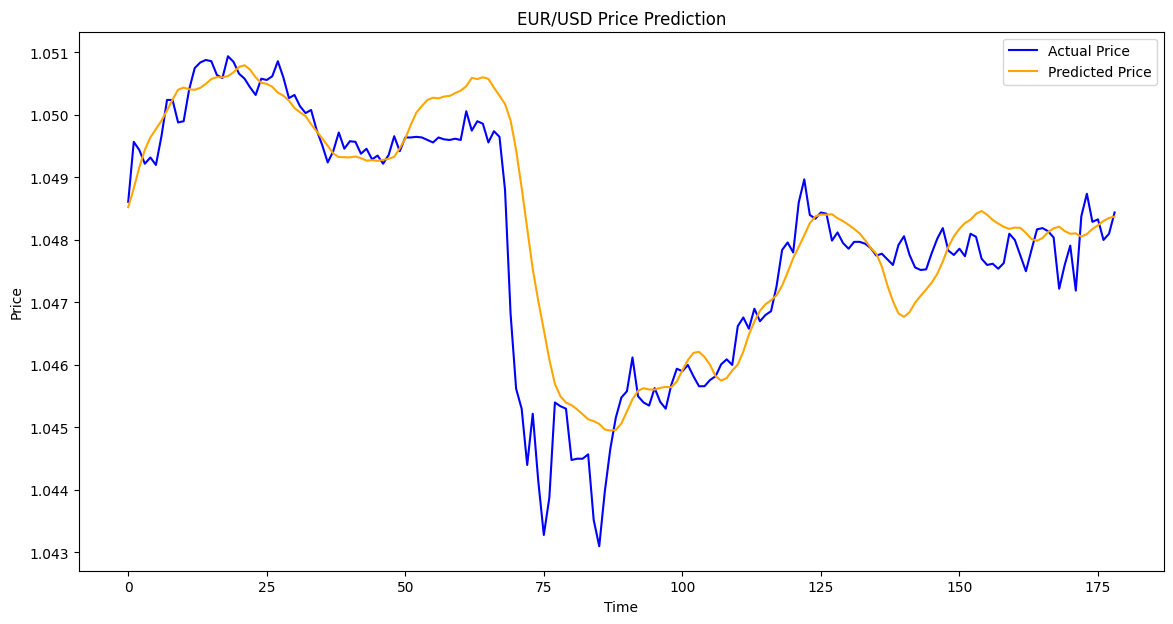

In [ ]:
import oandapyV20
import oandapyV20.endpoints.instruments as instruments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout

# OANDA API Credentials
ACCESS_TOKEN = "c18f86851d4bc0df6484465cc421b291-0cfa37fe32e0bd236d25613eb716b95e"
ACCOUNT_ID = "101-004-30239848-002"
client = oandapyV20.API(access_token=ACCESS_TOKEN)

# Step 1: Fetch Data from OANDA
def fetch_oanda_data(instrument="EUR_USD", granularity="M5", count=500):
    """
    Fetch historical price data from OANDA API.
    """
    params = {
        "granularity": granularity,
        "count": count
    }
    try:
        endpoint = instruments.InstrumentsCandles(instrument=instrument, params=params)
        client.request(endpoint)
        candles = endpoint.response["candles"]

        records = []
        for candle in candles:
            records.append({
                "time": candle["time"],
                "open": float(candle["mid"]["o"]),
                "high": float(candle["mid"]["h"]),
                "low": float(candle["mid"]["l"]),
                "close": float(candle["mid"]["c"]),
            })

        df = pd.DataFrame(records)
        df["time"] = pd.to_datetime(df["time"])
        return df
    except Exception as e:
        print(f"Error fetching data for {instrument}: {e}")
        return pd.DataFrame()

# Step 2: Calculate Indicators
def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_sma(prices, window):
    return prices.rolling(window=window).mean()

def calculate_ema(prices, window):
    return prices.ewm(span=window, adjust=False).mean()

def calculate_bollinger_bands(prices, window=20):
    sma = prices.rolling(window=window).mean()
    std = prices.rolling(window=window).std()
    upper_band = sma + (2 * std)
    lower_band = sma - (2 * std)
    return sma, upper_band, lower_band

# Step 3: Preprocess Data
def preprocess_data(data, target_column, sequence_length=60):
    if data.empty:
        raise ValueError("Dataset is empty. Cannot preprocess.")
    # Scale data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    # Create sequences
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i])  # Sequence of features
        y.append(scaled_data[i, target_column])    # Target value
    X, y = np.array(X), np.array(y)

    return X, y, scaler

# Step 4: Build and Train LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 5: Plot Results
def plot_results(actual, predicted, title="Price Prediction"):
    plt.figure(figsize=(14, 7))
    plt.plot(actual, label="Actual Price", color="blue")
    plt.plot(predicted, label="Predicted Price", color="orange")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Step 6: Main Workflow
if __name__ == "__main__":
    # Fetch data from OANDA
    data = fetch_oanda_data(instrument="EUR_USD", granularity="M5", count=1000)

    if data.empty:
        print("No data fetched. Exiting.")
    else:
        # Add indicators to the dataset
        data['RSI'] = calculate_rsi(data['close'])
        data['SMA_50'] = calculate_sma(data['close'], window=50)
        data['EMA_50'] = calculate_ema(data['close'], window=50)
        data['BB_Mid'], data['BB_Upper'], data['BB_Lower'] = calculate_bollinger_bands(data['close'])

        # Drop NaN values caused by rolling calculations
        data.dropna(inplace=True)

        # Preprocess data for LSTM
        feature_columns = ['close', 'RSI', 'SMA_50', 'EMA_50', 'BB_Mid', 'BB_Upper', 'BB_Lower']
        target_column = 0  # Predict 'close' price
        X, y, scaler = preprocess_data(data[feature_columns], target_column)

        # Split into train and test sets
        split = int(0.8 * len(X))
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]

        # Check if the model already exists
        try:
            model = load_model("oanda_lstm_trading_model.h5")
            print("Model loaded successfully!")
        except:
            # Build and train the LSTM model if no saved model exists
            print("No saved model found. Training a new model...")
            model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
            model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
            model.save("oanda_lstm_trading_model.h5")
            print("Model trained and saved successfully!")

        # Make predictions
        predictions = model.predict(X_test)

        # Reshape predictions and actual values
        predictions = predictions.reshape(-1, 1)  # Ensure shape is (n_samples, 1)
        y_test = y_test.reshape(-1, 1)            # Ensure shape is (n_samples, 1)

        # Rescale predictions and actual values back to original scale
        temp_array = np.zeros((predictions.shape[0], len(feature_columns)))
        temp_array[:, target_column] = predictions.ravel()
        predictions = scaler.inverse_transform(temp_array)[:, target_column]

        temp_array = np.zeros((y_test.shape[0], len(feature_columns)))
        temp_array[:, target_column] = y_test.ravel()
        actual = scaler.inverse_transform(temp_array)[:, target_column]

        # Plot results
        plot_results(actual, predictions, title="EUR/USD Price Prediction")


In [ ]:
!pip install oandapyV20
!pip install oandapyV20-helpers
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for oandapyV20: filename=oandapyV20-0.7.2-py3-none-any.whl size=69778 sha256=daf656875d6610debf2bec0c8831a398735c652e3ce5109eed171f65c7e14b33
  Stored in directory: /root/.cache/pip/wheels/8e/69/ab/a6da84a85b9bf3b5a98ca15c6c52b7854f32b10c70fe0531a1
Successfully built oandapyV20
ERROR: Could not find a version that satisfies the requirement oandapyV20-helpers (from versions: none)
ERROR: No matching distribution found for oandapyV20-helpers


In [ ]:
import oandapyV20
import oandapyV20.endpoints.pricing as pricing
import oandapyV20.endpoints.orders as orders
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from datetime import datetime, timedelta
import time

# OANDA API Credentials
ACCESS_TOKEN = "c18f86851d4bc0df6484465cc421b291-0cfa37fe32e0bd236d25613eb716b95e"
ACCOUNT_ID = "101-004-30239848-002"
client = oandapyV20.API(access_token=ACCESS_TOKEN)


# Load the LSTM Model
model = load_model("oanda_lstm_trading_model.h5")  # Ensure your trained model is saved as .h5

# Step 1: Fetch Real-Time OANDA Data
def fetch_oanda_data(instrument="EUR_USD", granularity="M1", count=60):
    """
    Fetch real-time price data from OANDA API.
    """
    params = {
        "granularity": granularity,
        "count": count
    }
    try:
        endpoint = instruments.InstrumentsCandles(instrument=instrument, params=params)
        client.request(endpoint)
        candles = endpoint.response["candles"]

        # Parse candles data
        records = []
        for candle in candles:
            if candle["complete"]:  # Use only completed candles
                records.append({
                    "time": candle["time"],
                    "open": float(candle["mid"]["o"]),
                    "high": float(candle["mid"]["h"]),
                    "low": float(candle["mid"]["l"]),
                    "close": float(candle["mid"]["c"]),
                })

        df = pd.DataFrame(records)
        df["time"] = pd.to_datetime(df["time"])
        return df
    except Exception as e:
        print(f"Error fetching data for {instrument}: {e}")
        return pd.DataFrame()

# Step 2: Calculate Indicators
def calculate_indicators(df):
    """
    Calculate RSI, SMA, EMA, and Bollinger Bands for the DataFrame.
    """
    def calculate_rsi(prices, period=14):
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    def calculate_sma(prices, window):
        return prices.rolling(window=window).mean()

    def calculate_ema(prices, window):
        return prices.ewm(span=window, adjust=False).mean()

    def calculate_bollinger_bands(prices, window=20):
        sma = prices.rolling(window=window).mean()
        std = prices.rolling(window=window).std()
        upper_band = sma + (2 * std)
        lower_band = sma - (2 * std)
        return sma, upper_band, lower_band

    df["RSI"] = calculate_rsi(df["close"])
    df["SMA_50"] = calculate_sma(df["close"], window=50)
    df["EMA_50"] = calculate_ema(df["close"], window=50)
    df["BB_Mid"], df["BB_Upper"], df["BB_Lower"] = calculate_bollinger_bands(df["close"])
    df.dropna(inplace=True)
    return df

# Step 3: Place Trades
def place_trade(instrument, action, units=1000):
    """
    Place a buy or sell order on OANDA.
    """
    order_data = {
        "order": {
            "instrument": instrument,
            "units": str(units) if action == "buy" else str(-units),
            "type": "MARKET",
            "timeInForce": "FOK",
        }
    }
    try:
        endpoint = orders.OrderCreate(accountID=ACCOUNT_ID, data=order_data)
        response = client.request(endpoint)
        print(f"{action.capitalize()} order placed successfully.")
        return response
    except Exception as e:
        print(f"Error placing {action} order: {e}")
        return None

# Step 4: Predict and Execute Trades
def predict_and_trade():
    instrument = "EUR_USD"
    granularity = "M1"  # 1-minute candles
    units = 1000

    print(f"Fetching data for {instrument}...")
    df = fetch_oanda_data(instrument=instrument, granularity=granularity, count=60)

    if df.empty:
        print("No data fetched. Skipping this cycle.")
        return

    print("Calculating indicators...")
    df = calculate_indicators(df)

    # Ensure all required features are present
    feature_columns = ["close", "RSI", "SMA_50", "EMA_50", "BB_Mid", "BB_Upper", "BB_Lower"]
    if any(col not in df.columns for col in feature_columns):
        print("Required features are missing. Skipping this cycle.")
        return

    # Prepare data for prediction
    X = df[feature_columns].values[-60:]  # Last 60 rows as input
    X = np.expand_dims(X, axis=0)  # Reshape for LSTM model

    # Predict the next price
    predicted_price = model.predict(X)[0][0]
    last_close = df["close"].iloc[-1]

    print(f"Last Close: {last_close}, Predicted Price: {predicted_price}")

    # Determine trade action
    if predicted_price > last_close:
        print("Signal: Buy")
        place_trade(instrument=instrument, action="buy", units=units)
    elif predicted_price < last_close:
        print("Signal: Sell")
        place_trade(instrument=instrument, action="sell", units=units)
    else:
        print("Signal: Hold")

# Step 5: Live Trading Loop
if __name__ == "__main__":
    print("Starting live trading loop...")
    start_time = datetime.now()
    end_time = start_time + timedelta(hours=1)  # Run for 1 hour

    while datetime.now() < end_time:
        predict_and_trade()
        print("Waiting for the next cycle...\n")
        time.sleep(60)  # Wait for 1 minute before the next cycle


Starting live trading loop...
Fetching data for EUR_USD...
Calculating indicators...


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
Last Close: 1.04975, Predicted Price: 1.2892014980316162
Signal: Buy
Buy order placed successfully.
Waiting for the next cycle...

Fetching data for EUR_USD...
Calculating indicators...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Last Close: 1.04987, Predicted Price: 1.2866783142089844
Signal: Buy
Buy order placed successfully.
Waiting for the next cycle...

Fetching data for EUR_USD...
Calculating indicators...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Last Close: 1.04998, Predicted Price: 1.2816168069839478
Signal: Buy
Buy order placed successfully.
Waiting for the next cycle...

Fetching data for EUR_USD...
Calculating indicators...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Last Close: 1.04963, Predicted Price: 1.2854793071746826
Signal: Buy
Buy order placed successfully.
Waiting for the next cycle...

Fetching data for EUR_USD...
Calculating indicators...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Last Close: 1.05001, Predicted Price: 1.2888431549072266
Signal: 